<a href="https://colab.research.google.com/github/Dianna22/ML/blob/master/SocialMediaBUZZ/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as mat_plt

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
PATH_PREFIX = '/content/gdrive/My Drive/ML/'

In [0]:
TWITTER_TRAIN = PATH_PREFIX + "data/train_500"
TWITTER_TEST = PATH_PREFIX + "data/test_500"
TWITTER_VAL = PATH_PREFIX + "data/val_500"

In [0]:
TWITTER_RELATIVE_500 = PATH_PREFIX + "data/Twitter-Relative-Sigma-500.data"
TWITTER_RELATIVE_1000 = PATH_PREFIX + "data/Twitter-Relative-Sigma-1000.data"
TWITTER_RELATIVE_1500 = PATH_PREFIX + "data/Twitter-Relative-Sigma-1500.data"

In [0]:
def load_data(path):
	data = pd.read_csv(path)
	return data
def load_dataset(path):
	data = pd.read_csv(path)
	return data[data.columns[:-1]], data[data.columns[-1]]

In [0]:
data_500 = load_data(TWITTER_RELATIVE_500)
data_1000 = load_data(TWITTER_RELATIVE_1000)
data_1500 = load_data(TWITTER_RELATIVE_1500)
data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,0.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,0.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,0.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,0.0


In [0]:
data.columns

Index(['NCD_0', 'NCD_1', 'NCD_2', 'NCD_3', 'NCD_4', 'NCD_5', 'NCD_6', 'AI_0',
       'AI_1', 'AI_2', 'AI_3', 'AI_4', 'AI_5', 'AI_6', 'AS(NA)_0', 'AS(NA)_1',
       'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4', 'AS(NA)_5', 'AS(NA)_6', 'BL_0',
       'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'NAC_0', 'NAC_1',
       'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6', 'AS(NAC)_0', 'AS(NAC)_1',
       'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4', 'AS(NAC)_5', 'AS(NAC)_6', 'CS_0',
       'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6', 'AT_0', 'AT_1', 'AT_2',
       'AT_3', 'AT_4', 'AT_5', 'AT_6', 'NA_0', 'NA_1', 'NA_2', 'NA_3', 'NA_4',
       'NA_5', 'NA_6', 'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5',
       'ADL_6', 'NAD_0', 'NAD_1', 'NAD_2', 'NAD_3', 'NAD_4', 'NAD_5', 'NAD_6',
       'BUZZ'],
      dtype='object')

In [0]:
pd.Series(data_500['BUZZ'].value_counts())
pd.Series(data_1000['BUZZ'].value_counts())

0.0    137087
1.0      3620
Name: BUZZ, dtype: int64

0.0    139530
1.0      1177
Name: BUZZ, dtype: int64

In [0]:
pd.Series(data_1500['BUZZ'].value_counts())

0.0    140219
1.0       488
Name: BUZZ, dtype: int64

non-buzz    137087
buzz          3620
Name: BUZZ, dtype: int64
137087


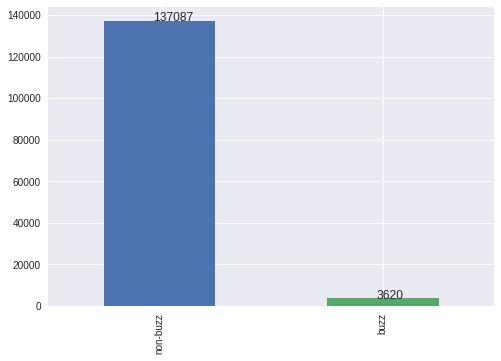

In [0]:
df=data_500['BUZZ'].value_counts()
df.index = ['non-buzz', 'buzz']
print(df)
ax=df.plot(kind='bar')
x_offset = -0.03
y_offset = 0.02
vals = list(df)
for i,p in enumerate(ax.patches):
    b = p.get_bbox()
    val = vals[i]
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

In [0]:
data_500[data_500.columns[-1]].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: BUZZ, dtype: float64

1. Number of created discussions

In [0]:
data_500.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.025727
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.158321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


In [0]:
data_500.filter(regex='NCD_?').loc[data_500['BUZZ']==1].describe().diff(axis=1).fillna(0).iloc[1]

NCD_0      0.000000
NCD_1   -193.096409
NCD_2     58.176796
NCD_3    111.170166
NCD_4    166.343646
NCD_5    259.040055
NCD_6    436.054144
Name: mean, dtype: float64

In [0]:
data_500.filter(regex='NCD_?').loc[data_500['BUZZ']==1].diff(axis=1).fillna(0).describe().iloc[1]


NCD_0      0.000000
NCD_1   -193.096409
NCD_2     58.176796
NCD_3    111.170166
NCD_4    166.343646
NCD_5    259.040055
NCD_6    436.054144
Name: mean, dtype: float64

In [0]:
data_500.filter(regex='NCD_?').loc[data_500['BUZZ']==0].describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6
count,137087.000000,137087.000000,137087.000000,137087.000000,137087.000000,137087.000000,137087.000000
mean,137.617287,125.134783,134.184737,142.905060,148.896803,172.100907,188.973841
std,343.654789,319.870275,349.008823,373.117213,384.658300,428.280696,441.119340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000
50%,20.000000,17.000000,19.000000,20.000000,21.000000,26.000000,30.000000
75%,110.000000,100.000000,106.000000,111.000000,117.000000,141.000000,163.000000
max,13055.000000,13799.000000,15313.000000,15445.000000,19710.000000,17257.000000,16973.000000


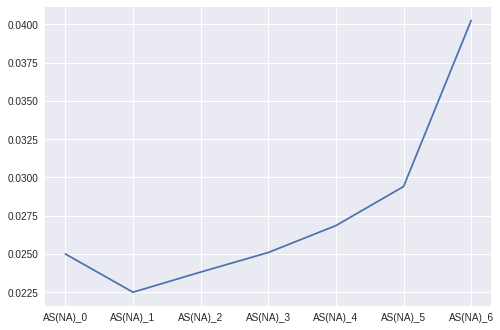

In [0]:
data_500.filter(regex='AS\(NA\)_?').loc[data_500['BUZZ']==1].describe().iloc[-1].plot(xticks=list(range(7)))

,BL_0,BL_1,BL_2,BL_3,BL_4,BL_5,BL_6
count,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000
mean,0.997464,0.962152,0.979230,0.987960,0.993211,0.996282,0.997835
std,0.005045,0.184319,0.133016,0.096758,0.066464,0.040757,0.017053
min,0.903382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.996412,0.995973,0.996972,0.997010,0.997086,0.996970,0.997447
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999871
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


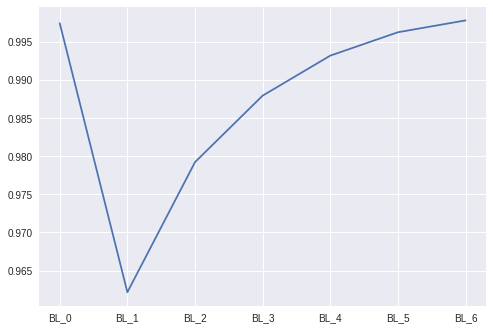

In [0]:
bl = data_500.filter(regex='BL_?').loc[data_500['BUZZ']==1].describe()
# bl_diffs = ai.diff(axis=1).fillna(0).iloc[1]
bl.iloc[1].plot(xticks=list(range(7)))
bl

In [0]:
ncd = data_500.filter(regex='NCD_?').loc[data_500['BUZZ']==1].describe()
ncd_diffs = ncd.diff(axis=1).fillna(0).iloc[1]
ai = data_500.filter(regex='AI_?').loc[data_500['BUZZ']==1].describe()
ai_diffs = ai.diff(axis=1).fillna(0).iloc[1]
# asna = data_500.filter(regex='AS\(NA\)_?').loc[data_500['BUZZ']==1].describe()
# asna_diffs = asna.diff(axis=1).fillna(0).iloc[1]
ai = data_500.filter(regex='AI_?').loc[data_500['BUZZ']==1].describe()
ai_diffs = ai.diff(axis=1).fillna(0).iloc[1]


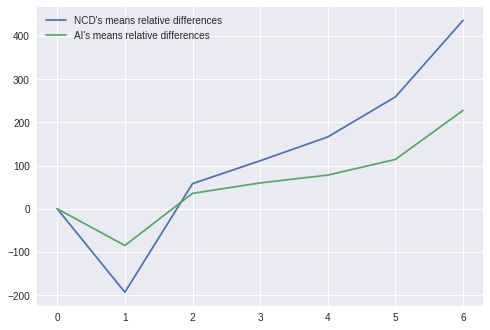

In [0]:
lines = [mat_plt.plot(list(range(7)), ncd_diffs, label="NCD's means relative differences")[0],
         mat_plt.plot(list(range(7)), ai_diffs, label="AI's means relative differences")[0],
        ]

mat_plt.legend(handles=lines)
mat_plt.show()

In [0]:
X, Y = data_500[data_500.columns[:-1]], data_500[data_500.columns[-1]]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

40.38529411764706


In [0]:
print(Y_test.value_counts()[0]/Y_test.value_counts()[1])
print(Y_train.value_counts()[0]/Y_train.value_counts()[1])
print(Y_val.value_counts()[0]/Y_val.value_counts()[1])

40.38529411764706
37.076955602537
38.15304347826087


AttributeError: ignored

In [0]:
X_train['BUZZ'] = Y_train
X_train.to_csv(PATH_PREFIX+'data/train_500', sep=',')

        NCD_0  NCD_1  NCD_2  NCD_3  NCD_4  NCD_5  NCD_6  AI_0  AI_1  AI_2  \
117580     39     37     42     58     37     47     63    24    30    30   
75985       2      2      3      5      0      5      5     0     1     3   
26003      20     24     22     21     22     21     50    15    18    13   
42407      24     13     19     17     25     21     28     7     8    11   
96432     563    451    312    384    463    565    565   232   205   154   

        ...      ADL_5     ADL_6  NAD_0  NAD_1  NAD_2  NAD_3  NAD_4  NAD_5  \
117580  ...   1.021277  1.079365     39     37     42     58     37     47   
75985   ...   1.000000  1.000000      2      2      3      5      0      5   
26003   ...   1.000000  1.000000     20     24     22     21     22     21   
42407   ...   1.000000  1.392857     24     13     20     17     25     21   
96432   ...   1.035273  1.021201    564    453    312    386    463    567   

        NAD_6  BUZZ  
117580     63   0.0  
75985       5   0.0  
26

In [0]:
X_test['BUZZ'] = Y_test
X_test.to_csv(PATH_PREFIX+'data/test_500', sep=',')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
X_val['BUZZ'] = Y_val
X_val.to_csv(PATH_PREFIX+'data/val_500', sep=',')

In [0]:
print(y_train.value_counts())
print(y_train.value_counts()[0]/y_train.value_counts()[1])

0.0    102844
1.0      2686
Name: BUZZ, dtype: int64
38.28890543559196


In [0]:
X,Y = np.array(X), np.array(Y)
for train_index, test_index in skf.split(X, Y):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = Y[train_index], Y[test_index]


TRAIN: [ 70320  70321  70322 ... 140704 140705 140706] TEST: [    0     1     2 ... 71572 71721 71797]
TRAIN: [    0     1     2 ... 71572 71721 71797] TEST: [ 70320  70321  70322 ... 140704 140705 140706]


In [0]:
Y.value_counts()

0.0    137087
1.0      3620
Name: BUZZ, dtype: int64